## Installing Needed Dependencies:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\v-paszaf\\Desktop'

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

## Feature engineering:

In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1524,1525,15653595,Ts'ai,796,France,Male,51,6,0.00,2,0,1,194733.28,0
6945,6946,15747821,K?,554,Germany,Female,31,6,135470.90,1,1,0,107074.81,0
3024,3025,15610801,Pan,648,Germany,Male,41,5,123049.21,1,0,1,5066.76,0
8956,8957,15723481,Wright,728,Spain,Male,42,8,0.00,2,0,1,41823.22,0
1090,1091,15604304,Perry,539,Germany,Female,34,4,91622.42,1,1,1,136603.42,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df_geo = pd.get_dummies(df['Geography'])

In [11]:
df = pd.concat([df,df_geo], axis=1)

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [13]:
df.drop(['Geography'], axis = 1, inplace=True)

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
6543,6544,15796218,Wei,814,1,29,1,131968.57,2,1,1,147693.92,0,0,1,0
8607,8608,15643215,Jen,602,1,38,2,71667.97,2,0,0,137111.89,0,0,1,0
4887,4888,15614213,Muramats,620,1,37,0,107548.94,1,1,0,71175.94,0,1,0,0
9054,9055,15617476,Manfrin,546,0,30,5,0.00,2,0,1,198543.09,0,1,0,0
5370,5371,15728564,Lo,682,1,41,6,0.00,2,0,1,134158.09,1,1,0,0


In [19]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace=True)

In [20]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
X = df.drop(['Exited'], axis = 1).values
y = df['Exited'].values

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc =StandardScaler()

In [24]:
X = sc.fit_transform(X)

## Model Evaluation with Cross Validation:

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [134]:
def models():
    return [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Extra Trees', ExtraTreesClassifier()),
        ('XGboost', GradientBoostingClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoost', AdaBoostClassifier()),
        ('KNN', KNeighborsClassifier())
    ]

In [135]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2)
    mean_test = np.round( np.mean(result['test_score']), 2)
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

Logistic Regression


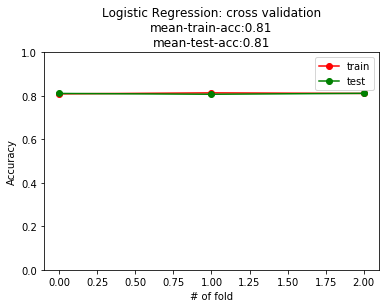

Decision Tree


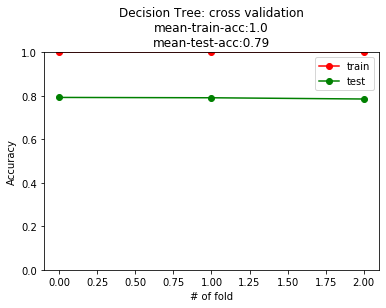

Random Forest


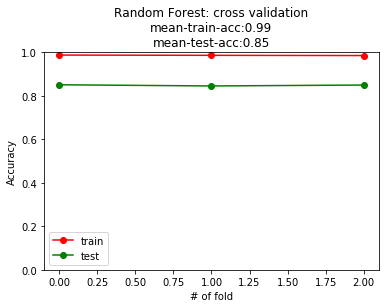

Extra Trees


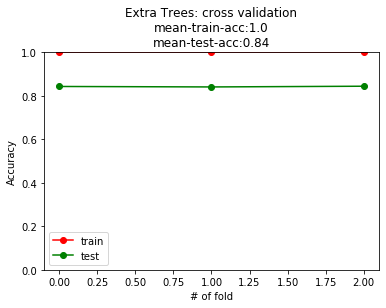

XGboost


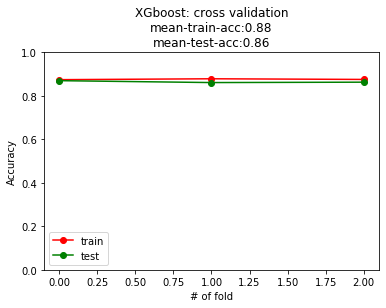

Naive Bayes


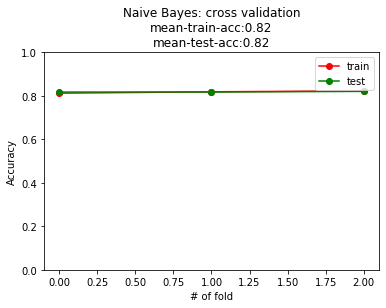

SVC


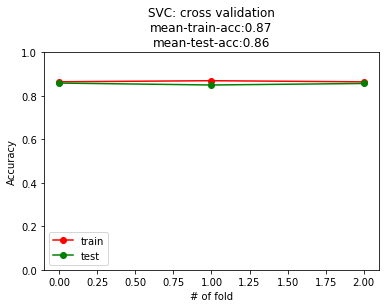

AdaBoost


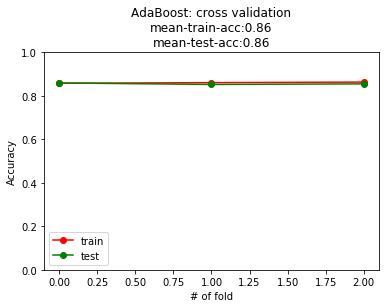

KNN


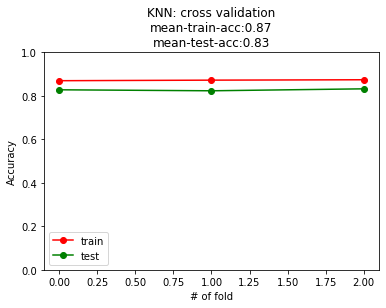

In [136]:
for model_name, model in models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_estimator=True, return_train_score= True)
    print(model_name)

    plot_result(model_name, result)

## Grid Search

In [71]:
from sklearn.model_selection import GridSearchCV

In [152]:
                                  #Logistic Regression

In [137]:
param_log={
           "C":np.logspace(-3,3,7),
           "penalty":["l1","l2"]
           }

In [73]:
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,param_log,cv=10)
logreg_grid.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_grid.best_params_)
print("accuracy :",logreg_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.8094029850746268


In [103]:
# logreg_grid.fit(X_train,y_train)
# print("score",logreg_grid.score(X_test,y_test))

score 0.813939393939394


C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
scores_log = cross_validate(logreg_grid, X_train, y_train, cv=3)

In [75]:
cross_validate(logreg_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

{'fit_time': array([2.54917979, 2.69379568, 2.75662804]),
 'score_time': array([0.00099635, 0.        , 0.00099778]),
 'estimator': (GridSearchCV(cv=10, error_score='raise-deprecating',
               estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='warn',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='warn',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
               iid='warn', n_jobs=None,
               param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                           'penalty': ['l1', 'l2']},
               pre_dispatch='2*n_jobs', r

In [76]:
print('scores for cross validation of Logistic Regression after grid search:')
print('cross validation test score:',scores_log['test_score']), 
print('test score mean:', np.round(scores_log['test_score'].mean(), 4),'±', np.round(scores_log['test_score'].std(), 4))

scores for cross validation of Logistic Regression after grid search:
cross validation test score: [0.79991047 0.81244405 0.81675627]
test score mean: 0.8097 ± 0.0071


In [ ]:
                                   #Decision Tree

In [34]:
param_DT = {
            'min_samples_split' : range(10,500,20),
            'max_depth': range(1,20,2)
            }


In [ ]:
DT_grid=GridSearchCV(DecisionTreeClassifier(), param_DT)
DT_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",DT_grid.best_params_)
print("accuracy :", DT_grid.best_score_)

In [ ]:
scores_DT= cross_validate(DT_grid, X_train, y_train, cv=3)

In [45]:
cross_validate(DT_grid, X_train, y_train, scoring='roc-auc', cv=3, return_estimator=True, return_train_score= True)


{'fit_time': array([7.31391644, 7.527174  , 8.40647244]),
 'score_time': array([0.00099826, 0.00199485, 0.00099707]),
 'estimator': (GridSearchCV(cv='warn', error_score='raise-deprecating',
               estimator=DecisionTreeClassifier(class_weight=None,
                                                criterion='gini', max_depth=None,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort=False, random_state=None,
                                                splitter='best'),
              

In [39]:
print('scores for cross validation of Decision Tree after grid search:')
print('cross validation test score:',scores_DT['test_score']), 
print('test score mean:', np.round(scores_DT['test_score'].mean(), 4),'±', np.round(scores_DT['test_score'].std(), 4))

scores for cross validation of Decision Tree after grid search:
cross validation test score: [0.84959714 0.85094002 0.83691756]
test score mean: 0.8458 ± 0.0063


In [ ]:
                              #Random Forest

In [48]:
param_RF = {
               'n_estimators': np.arange(1, 200, 10),
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.arange(2, 10),
               'min_samples_split': np.arange(2, 20, 2),
               'min_samples_leaf': np.arange(1,5),
               'bootstrap': [True, False]
            }

In [ ]:
RF_grid=GridSearchCV(RandomForestClassifier(), param_RF)
RF_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",RF_grid.best_params_)
print("accuracy :", RF_grid.best_score_)

In [ ]:
scores_RF= cross_validate(RF_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(RF_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)


In [ ]:
print('scores for cross validation of Random Forest after grid search:')
print('cross validation test score:',scores['test_score']), 
print('test score mean:', np.round(scores_RF['test_score'].mean(), 4),'±', np.round(scores_RF['test_score'].std(), 4))

In [151]:
                                #Extreme Trees

In [ ]:
param_ET = {
            'n_estimators': np.arange(1, 200, 10),
            'max_features': ['auto', 'sqrt'],
            'max_depth': np.arange(2, 10),
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1,5),
            'bootstrap': [True, False]
           }

In [ ]:
ET_grid=GridSearchCV(ExtraTreesClassifier(), param_ET)
ET_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",ET_grid.best_params_)
print("accuracy :", ET_grid.best_score_)

In [ ]:
scores_ET= cross_validate(ET_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(ET_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of Extreme Tress after grid search:')
print('cross validation test score:',scores_ET['test_score']), 
print('test score mean:', np.round(scores_ET['test_score'].mean(), 4),'±', np.round(scores_ET['test_score'].std(), 4))

In [ ]:
                                     #XG Boost

In [ ]:
param_XG ={
          'loss': ['deviance', 'exponential'],
          'learning_rate'= np.arange(0.1, 1),
          'n_estimators': np.arange(1, 200, 10),
          'max_features': ['auto', 'sqrt'],
          'max_depth': np.arange(2, 10),
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,5),
          }

In [ ]:
XG_grid=GridSearchCV(GradientBoostingClassifier(), param_XG)
XG_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",XG_grid.best_params_)
print("accuracy :", XG_grid.best_score_)

In [ ]:
scores_XG= cross_validate(XG_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(XG_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of XG Boost after grid search:')
print('cross validation test score:',scores_XG['test_score']), 
print('test score mean:', np.round(scores_XG['test_score'].mean(), 4),'±', np.round(scores_XG['test_score'].std(), 4))

In [150]:
                                #Support Vector Machine

In [138]:
param_SVM ={
            'C': [0.1,1, 10, 100, 1000],
            'gamma': [1,0.1,0.01,0.001,0.0001],
            'kernel': ['rbf', 'poli', 'linear']
            } 

In [ ]:
SVM_grid=GridSearchCV(SVC(), param_SVM)
XG_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",SVM_grid.best_params_)
print("accuracy :", SVM_grid.best_score_)

In [ ]:
scores_SVM= cross_validate(SVM_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(SVM_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of SVM after grid search:')
print('cross validation test score:',scores_SVM['test_score']), 
print('test score mean:', np.round(scores_SVM['test_score'].mean(), 4),'±', np.round(scores_SVM['test_score'].std(), 4))

In [149]:
                                  # Ada Boost

In [ ]:
param_AB = {
            'n_estimators': np.arange(1, 100, 10),
            'learning_rate': np.arange(0.1, 1),
            'algorithm': ['SAMME', 'SAMME.R']
            }

In [ ]:
AB_grid=GridSearchCV(AdaBoostClassifier(), param_AB)
AB_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",AB_grid.best_params_)
print("accuracy :", AB_grid.best_score_)

In [ ]:
scores_AB= cross_validate(AB_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(AB_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of Ada Boost after grid search:')
print('cross validation test score:',scores_AB['test_score']), 
print('test score mean:', np.round(scores_AB['test_score'].mean(), 4),'±', np.round(scores_AB['test_score'].std(), 4))

In [153]:
                           #Nearest Neighbour

In [ ]:
param_NN = {
            'n_neighbors': np.arange(1,20),
            'radius': np.arange(1.0, 10.0, 1.0),
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': np.arange(10,100,10) 
            }

In [ ]:
NN_grid=GridSearchCV(KNeighborsClassifier(), param_NN)
NN_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",NN_grid.best_params_)
print("accuracy :", NN_grid.best_score_)

In [ ]:
scores_NN= cross_validate(NN_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(NN_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of Nearest Neighbour after grid search:')
print('cross validation test score:',scores_NN['test_score']), 
print('test score mean:', np.round(scores_NN['test_score'].mean(), 4),'±', np.round(scores_NN['test_score'].std(), 4))

#### Elbow Method for KNN algorithm to check if generate better result than grid search

In [ ]:
KN =KNeighborsClassifier()

In [ ]:
KN.fit(X_train, y_train)

In [ ]:
pred_KN = KN.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred_KN))
print('\n')
print(confusion_matrix(y_test, pred_KN))

In [ ]:
error_rate = []

for i in range(1,50):
    
    KN = KNeighborsClassifier(n_neighbors=i)
    KN.fit(X_train,y_train)
    pred_i = KN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
KN =KNeighborsClassifier(n_neighbors = 17)

In [ ]:
KN.fit(X_train,y_train)

In [ ]:
pred_KN = KN.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred_KN))
print('\n')
print(confusion_matrix(y_test, pred_KN))

In [ ]:
cross_validate(KN, X_train, y_train, cv =3)

## ##############################################

In [116]:
from sklearn.cluster import KMeans

In [117]:
KM = KMeans()

In [118]:
KM.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
KM_pred = KM.predict((y_test).reshape(-1, 12))

In [ ]:
print(classification_report(y_test, KM_pred))
print('\n')
print(confusion_matrix(y_test, KM_pred))

## #######################

## Neural Networks

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

Using TensorFlow backend.


In [29]:
def keras_model():
  model = Sequential()
  model.add(Dense(32, input_shape= (X.shape[1],), activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy']),
  keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
  result = model.evaluate(X_test, y_test)
  return model

In [30]:
model = KerasClassifier(
                        build_fn=keras_model,
                        epochs=1000, verbose=2,
                      )

In [ ]:
model.fit(X_train, y_train)

In [64]:
result = model.score(X_test, y_test)
print("Accuracy: %.2f" % (result*100.0))

Accuracy: 84.21


In [ ]:
scores_ANN= cross_validate(model, X_train, y_train, cv=3)

In [ ]:
cross_validate(model, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [70]:
print('scores for cross validation of ANN:')
print('cross validation test score:',scores_ANN['test_score']), 
print('test score mean:', np.round(scores_ANN['test_score'].mean(), 4),'±', np.round(scores_ANN['test_score'].std(), 4))

scores for cross validation of ANN:
cross validation test score: [0.81512981 0.82086879 0.81191223]
test score mean: 0.816 ± 0.0037


In [71]:
# ANN after Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def c_model(optimizer, activation, neurons):
  model = Sequential()
  model.add(Dense(neurons, activation=activation))
  model.add(Dense(neurons//2, activation=activation))
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
  return model

In [ ]:
model = KerasClassifier(build_fn=c_model)

In [ ]:
 param_grid ={'optimizer' : ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam'], 'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], 'neurons' : [4,8,16,32,64]}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True, verbose=3)

In [ ]:
grid = GridSearchCV(model,param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
ANN_grid=GridSearchCV(KerasClassifier(), param_grid)
ANN_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",ANN_grid.best_params_)
print("accuracy :", ANN_grid.best_score_)

In [ ]:
scores_ANN_grid= cross_validate(ANN_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(ANN_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print(grid.best_params_)
print('scores for cross validation of Nearest Neighbour after grid search:')
print('cross validation test score:',scores_ANN_grid['test_score']), 
print('test score mean:', np.round(scores_ANN_grid['test_score'].mean(), 4),'±', np.round(scores_ANN_grid['test_score'].std(), 4))